In [1]:
import numpy as np
import h5py
from astropy.io import fits
from astropy.table import Table
from scipy.interpolate import interp1d
from scipy.interpolate import RegularGridInterpolator
import matplotlib.cm as cm
import matplotlib.colors as mcolors

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.linestyle'] = (0, (1, 5))
mpl.rcParams['grid.color'] = 'grey'
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.labelsize'] = 22
mpl.rcParams['legend.handlelength'] = 3
mpl.rcParams['legend.fontsize'] = 20

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

Text(0, 0.5, '$\\Delta \\mu$')

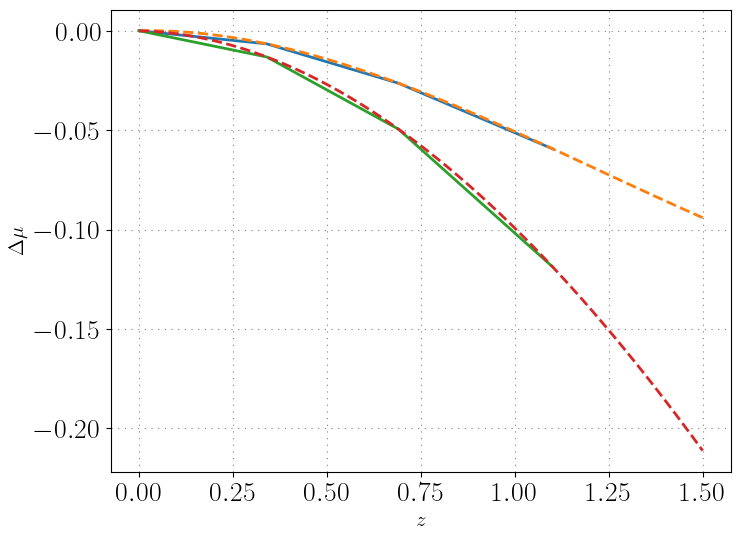

In [5]:
data = [[-0.006593406593406681, 9.02930402930403],
        [-0.05934065934065946, 8.926966504286092],
        [-0.1186813186813187, 8.790359125410673],
        [-1.1102230246251565e-16, 5.713058419243987],
        [-0.02637362637362639, 5.661889656735018],
        [-0.04945054945054961, 5.593491559986406],
        [-1.1102230246251565e-16, 2.362542955326461],
        [-0.006593406593406681, 2.3454552320531707],
        [-0.013186813186813251, 2.3283675087798805]]

z = [0, 0.34, 0.69, 1.10]
a05 = [0, -0.006593406593406681, -0.02637362637362639, -0.05934065934065946]
a10 = [0, -0.013186813186813251, -0.04945054945054961, -0.11868131868131870]

fa05 = interp1d(z, a05, fill_value="extrapolate",kind='cubic')
fa10 = interp1d(z, a10, fill_value="extrapolate",kind='cubic')
zarr = np.linspace(0,1.5,100)

plt.plot(z, a05)
plt.plot(zarr, fa05(zarr),ls='--')
plt.plot(z, a10)
plt.plot(zarr, fa10(zarr),ls='--')
plt.xlabel('$z$', fontsize=15)
plt.ylabel('$\Delta \mu$', fontsize=15)

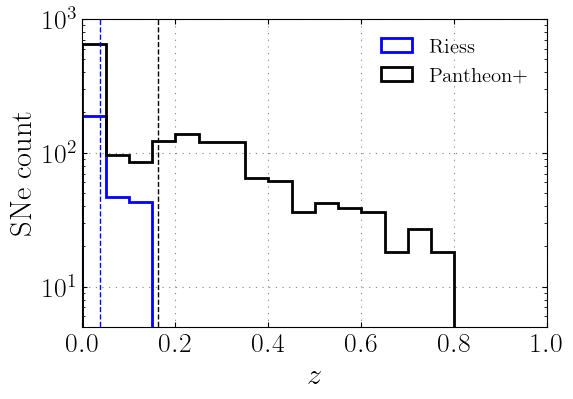

In [2]:
# load the SNe in Hubble flow from pantheon
SNe_file = 'data/Pantheon+SH0ES.dat'
t = Table.read(SNe_file, format='ascii')
idx = np.where(t['USED_IN_SH0ES_HF'])

fig, ax = plt.subplots()
fig.set_size_inches(6, 4)

bins = np.linspace(0, 1, 21)

ax.hist(t[idx]['zHD'], bins=bins, density=False, histtype='step', 
           ls='-', edgecolor='blue', label=r'Riess', lw=2)
ax.hist(t['zHD'], bins=bins, density=False, histtype='step', 
           ls='-', edgecolor='black', label=r'Pantheon+', lw=2)

ax.plot([np.median(t[idx]['zHD']), np.median(t[idx]['zHD'])], [0,1000], color='blue', lw=1, ls='--')
ax.plot([np.median(t['zHD']), np.median(t['zHD'])], [0,1000], color='black', lw=1, ls='--')

np.median(t[idx]['zHD']), np.median(t['zHD'])

ax.set_xlim(0, 1)
ax.set_ylim(5, 1000)
ax.set_yscale('log')
ax.set_xlabel(r'$z$')
ax.set_ylabel(r'SNe count')
ax.legend(framealpha=0, loc='upper right', fontsize=15, handlelength=1.5)

ax.tick_params(axis='both', which='major', direction='in', 
                    bottom=True, top=True, left=True, right=True)
ax.tick_params(axis='both', which='minor', direction='in', 
                    bottom=True, top=True, left=True, right=True)

fig.savefig('plots/SNe_redshift_hist.pdf', bbox_inches='tight')


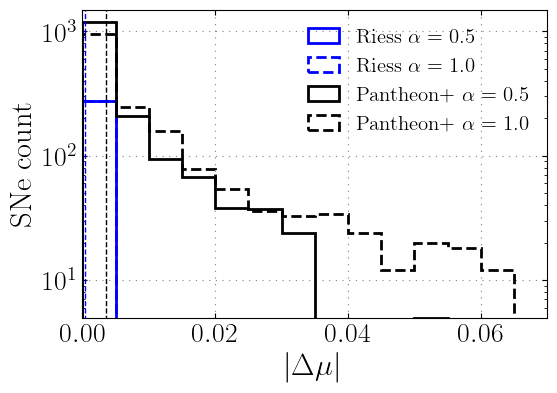

In [3]:
# load the SNe in Hubble flow from pantheon
SNe_file = 'data/Pantheon+SH0ES.dat'
t = Table.read(SNe_file, format='ascii')
idx = np.where(t['USED_IN_SH0ES_HF'])

# fitting median (de) amplifications from Zumalacárregui 2018
z = [0, 0.34, 0.69, 1.10]
a05 = [0, -0.006593406593406681, -0.02637362637362639, -0.05934065934065946]
a10 = [0, -0.013186813186813251, -0.04945054945054961, -0.11868131868131870]
fa05 = interp1d(z, a05, fill_value="extrapolate",kind='cubic')
fa10 = interp1d(z, a10, fill_value="extrapolate",kind='cubic')

# the intrinsic brightnesses should be higher:
Delta_mu_a05_HF = np.abs(fa05(t[idx]['zHD']))
Delta_mu_a10_HF = np.abs(fa10(t[idx]['zHD']))
Delta_mu_a05_Panth = np.abs(fa05(t['zHD']))
Delta_mu_a10_Panth = np.abs(fa10(t['zHD']))

fig, ax = plt.subplots()
fig.set_size_inches(6, 4)

bins = np.linspace(0, 0.1, 21)

ax.hist(Delta_mu_a05_HF, bins=bins, density=False, histtype='step', 
           ls='-', edgecolor='blue', label=r'Riess $\alpha=0.5$', lw=2)
ax.hist(Delta_mu_a10_HF, bins=bins, density=False, histtype='step', 
           ls='--', edgecolor='blue', label=r'Riess $\alpha=1.0$', lw=2)
ax.hist(Delta_mu_a05_Panth, bins=bins, density=False, histtype='step', 
           ls='-', edgecolor='black', label=r'Pantheon+ $\alpha=0.5$', lw=2)
ax.hist(Delta_mu_a10_Panth, bins=bins, density=False, histtype='step', 
           ls='--', edgecolor='black', label=r'Pantheon+ $\alpha=1.0$', lw=2)
ax.plot([np.median(Delta_mu_a10_HF), np.median(Delta_mu_a10_HF)], [0,1e4], color='blue', lw=1, ls='--')
ax.plot([np.median(Delta_mu_a10_Panth), np.median(Delta_mu_a10_Panth)], [0,1e4], color='black', lw=1, ls='--')


ax.set_xlim(0, 0.07)
ax.set_ylim(5, 1.5e3)
ax.set_xlabel(r'$|\Delta\mu|$')
ax.set_ylabel(r'SNe count')
ax.set_yscale('log')
ax.legend(framealpha=0, loc='upper right', fontsize=15, handlelength=1.5)

ax.tick_params(axis='both', which='major', direction='in', 
                    bottom=True, top=True, left=True, right=True)
ax.tick_params(axis='both', which='minor', direction='in', 
                    bottom=True, top=True, left=True, right=True)

fig.savefig('plots/SNe_Delta_Mu_hist.pdf', bbox_inches='tight')


/var/folders/02/0r851hhj6xxcvp48_3vzfpg80000gn/T/ipykernel_31708/1957752296.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')


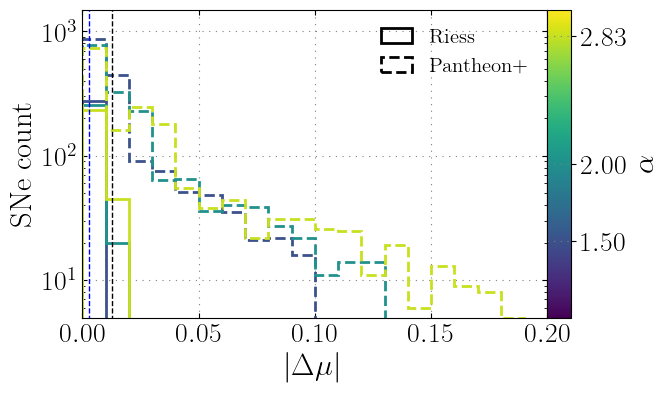

In [4]:
# load the SNe in Hubble flow from pantheon
SNe_file = 'data/Pantheon+SH0ES.dat'
t = Table.read(SNe_file, format='ascii')
idx = np.where(t['USED_IN_SH0ES_HF'])

z = [0, 0.34, 0.69, 1.10]
alpha = [0, 0.5, 1.0]
mu = np.array([[0, 0, 0, 0], 
      [0, -0.006593406593406681, -0.02637362637362639, -0.05934065934065946],
      [0, -0.013186813186813251, -0.04945054945054961, -0.11868131868131870]])

zamu = RegularGridInterpolator((alpha, z), mu, method='slinear', bounds_error=False, fill_value=None)

def Delta_mu(alpha, z):
    # alpha - scalar
    # z - array
    # zamu takes [alpha, redshift]
    Dmu = zamu(np.array([np.ones(len(z))*alpha, z]).T) # transpose to make it work for arrays
    return Dmu

# the intrinsic brightnesses should be higher:
Delta_mu_a283_HF = np.abs(Delta_mu(2.83, t[idx]['zHD']))
Delta_mu_a283_Panth = np.abs(Delta_mu(2.83, t['zHD']))
Delta_mu_a200_HF = np.abs(Delta_mu(2.0, t[idx]['zHD']))
Delta_mu_a200_Panth = np.abs(Delta_mu(2.0, t['zHD']))
Delta_mu_a150_HF = np.abs(Delta_mu(1.5, t[idx]['zHD']))
Delta_mu_a150_Panth = np.abs(Delta_mu(1.5, t['zHD']))

fig, ax = plt.subplots()
fig.set_size_inches(6, 4)

cbar_loc = [0.9, 0.11, 0.04, 0.77]
cmap = cm.get_cmap('viridis')
norm = mcolors.Normalize(vmin=1, vmax=3)
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar_ax = fig.add_axes(cbar_loc)  # [left, bottom, width, height]
cbar = plt.colorbar(sm, cax=cbar_ax, shrink=1)
cbar_ax.set_yticks([1.5, 2.0, 2.83])
cbar_ax.set_ylabel(r'$\alpha$')

bins = np.linspace(0, 0.2, 21)
ax.hist([0], bins=1, color='black', alpha=1, histtype='step', lw=2, ls='-', label='Riess')
ax.hist([0], bins=1, color='black', alpha=1, histtype='step', lw=2, ls='--', label='Pantheon+')
ax.hist(Delta_mu_a150_HF, bins=bins, density=False, histtype='step', 
           ls='-', edgecolor=cmap(norm(1.5)), lw=2)
ax.hist(Delta_mu_a150_Panth, bins=bins, density=False, histtype='step', 
           ls='--', edgecolor=cmap(norm(1.5)), lw=2)
ax.hist(Delta_mu_a200_HF, bins=bins, density=False, histtype='step', 
           ls='-', edgecolor=cmap(norm(2.0)), lw=2)
ax.hist(Delta_mu_a200_Panth, bins=bins, density=False, histtype='step', 
           ls='--', edgecolor=cmap(norm(2.0)), lw=2)
ax.hist(Delta_mu_a283_HF, bins=bins, density=False, histtype='step', 
           ls='-', edgecolor=cmap(norm(2.83)), lw=2)
ax.hist(Delta_mu_a283_Panth, bins=bins, density=False, histtype='step', 
           ls='--', edgecolor=cmap(norm(2.83)), lw=2)
ax.plot([np.median(Delta_mu_a200_HF), np.median(Delta_mu_a200_HF)], [0,1e4], color='blue', lw=1, ls='--')
ax.plot([np.median(Delta_mu_a200_Panth), np.median(Delta_mu_a200_Panth)], [0,1e4], color='black', lw=1, ls='--')

ax.set_xlim(0, 0.2)
ax.set_ylim(5, 1.5e3)
ax.set_xlabel(r'$|\Delta\mu|$')
ax.set_ylabel(r'SNe count')
ax.set_yscale('log')
ax.legend(framealpha=0, loc='upper right', fontsize=15, handlelength=1.5)

ax.tick_params(axis='both', which='major', direction='in', 
                    bottom=True, top=True, left=True, right=True)
ax.tick_params(axis='both', which='minor', direction='in', 
                    bottom=True, top=True, left=True, right=True)

fig.savefig('plots/SNe_Delta_Mu_large_alpha_hist.pdf', bbox_inches='tight')
